**Full name**: Dang Ha Nguyen (Janice) Nguyen

**Repository**: [GitHub Repository](https://github.com/JaniceNguyen/-BUSA8090_Assignment2)

# BUSA8001 - ASSIGNMENT 2

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from packaging import version
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

## 1. Introduction

### 1.1. Problem Statement
The purpose of this customer segmentation analysis is to identify distinct groups of customers based on their demographic, socioeconomic, and geographic characteristics. This segmentation will enable the company to develop targeted marketing strategies, improve customer service, and optimize product offerings for each distinct customer group.

### 1.2. Project Objectives
- Identify distinct customer segments based on demographic and socioeconomic factors.
- Analyze the characteristics and needs of each customer segment.
- Develop actionable insights for targeted marketing and product development.
- Compare and evaluate different clustering techniques for customer segmentation.
- Provide recommendations for tailored strategies for each identified customer segment.

### 1.3. Methodology Overview
- Data Preparation: Clean and preprocess the dataset, including handling missing values and encoding categorical variables.
- Exploratory Data Analysis (EDA): Perform statistical analysis and data visualization to understand the distribution and relationships between variables.
- Feature Engineering: Select and transform relevant features for clustering analysis.
- Clustering Analysis: Apply K-means++ and Agglomerative Clustering techniques to segment customers.
- Cluster Evaluation: Use the Elbow Method and Silhouette Analysis to determine the optimal number of clusters.
- Segment Profiling: Characterize each customer segment based on their distinctive features.
- Comparative Analysis: Compare the results of different clustering techniques and interpret the findings.

### 1.4. Dataset Description
The dataset contains information on customers with the following attributes:
- Gender: Categorical (male/female)
- Marital Status: Categorical (single/non-single)
- Age: Numerical (in years)
- Education: Categorical (other/unknown, high school, university, graduate school)
- Income: Numerical (annual income in currency units)
- Occupation: Categorical (unemployed/unskilled, skilled employee/official, management/self-employed/highly qualified employee/officer)
- Settlement Size: Categorical (small city, mid-sized city, big city)

This diverse set of attributes provides a comprehensive view of the customers, encompassing demographic (gender, age, marital status), socioeconomic (education, income, occupation), and geographic (settlement size) factors. The dataset will allow for a multifaceted analysis of customer segments, enabling the development of targeted strategies across various dimensions of customer characteristics.



## 2. Data Preparation
### 2.1. Review Data Legend

In [343]:
df_legend = pd.read_csv('data/data legend.csv')
df_legend.head()

,Variable,Range,Description
0,NaN,NaN,NaN
1,Gender,"{0,1}",Biological sex (gender) of a customer. In this...
2,NaN,0,male
3,NaN,1,female
4,NaN,NaN,NaN


In [344]:
df_legend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     7 non-null      object
 1   Range        21 non-null     object
 2   Description  23 non-null     object
dtypes: object(3)
memory usage: 852.0+ bytes


 This DataFrame contains information about variables, their ranges, and descriptions. It has 30 rows and 3 columns, all of string type. There are some missing values in each column. The data appears to be a legend or data dictionary, likely describing variables used in another dataset, with details on gender coding (0 for male, 1 for female) visible in the sample rows.

### 2.2. Inspect Raw Data

In [345]:
df_data = pd.read_csv('data/data.csv')
df_data.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,39,2,130568,1,2
1,0,0,29,1,80315,0,0
2,1,0,35,0,107067,0,0
3,0,1,56,2,214000,1,0
4,1,1,45,2,158138,1,2


In [346]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2000 non-null   int64
 1   Marital Status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [347]:
df_data.isnull().sum()

Gender             0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
dtype: int64

This DataFrame contains demographic and socioeconomic information about individuals. It has 2000 rows and 7 columns. All columns are of integer type (int64) and there are no missing values (all columns have 2000 non-null counts). The data appears to be coded numerically, likely corresponding to categorical values for most variables (except Age and possibly Income).

In [348]:
df_data.describe()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.60450,0.500500,40.823500,1.456500,137516.196500,0.612500,0.834000
std,0.48908,0.500125,9.455848,0.783846,46184.296588,0.674219,0.967942
min,0.00000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.00000,0.000000,33.000000,1.000000,101262.750000,0.000000,0.000000
50%,1.00000,1.000000,40.000000,1.000000,133004.000000,1.000000,0.000000
75%,1.00000,1.000000,48.000000,2.000000,171232.500000,1.000000,2.000000
max,1.00000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000


The statistical summary shows that ages range from 20 to 76, with a mean of 40.8 years. Income varies widely from 35,832 to 309,364, with a mean of 137,516. Gender, marital status, education, occupation, and settlement size are coded numerically, with means suggesting varying distributions across categories.

### 2.3. Map and Label Data

This section focuses on mapping and labeling the data. It involves transforming the numeric codes in the main dataset into meaningful categorical labels using the information provided in the legend dataset.

In [349]:
def extract_mappings(df_legend):
    mappings = {}
    current_variable = None
    for _, row in df_legend.iterrows():
        if pd.notna(row['Variable']):
            current_variable = row['Variable']
            mappings[current_variable] = {}
        elif pd.notna(row['Range']) and current_variable:
            try:
                key = int(row['Range'])
                value = row['Description'].strip()
                mappings[current_variable][key] = value
            except ValueError:
                pass  # Skip if Range is not a number
    return mappings

# Extract mappings from df_legend
mappings = extract_mappings(df_legend)

This function maps the numeric codes in the main dataset to their corresponding categorical labels based on the legend DataFrame. It returns a new DataFrame with categorical labels for each variable, making the data more interpretable and user-friendly.

In [350]:
# Apply mappings and validate data
for column, mapping in mappings.items():
    if column in df_data.columns and mapping:  # Check if mapping is not empty
        df_data[column] = df_data[column].map(mapping).fillna(df_data[column])
        
# Handle 'Age' and 'Income' separately
if 'Age' in df_data.columns:
    df_data['Age'] = pd.to_numeric(df_data['Age'], errors='coerce')

if 'Income' in df_data.columns:
    df_data['Income'] = pd.to_numeric(df_data['Income'], errors='coerce')

In [351]:
df_data.columns

Index(['Gender', 'Marital Status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement Size'],
      dtype='object')

In [352]:
df_data.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,female,non-single (divorced / separated / married / w...,39,university,130568.0,skilled employee / official,big city
1,male,single,29,high school,80315.0,unemployed / unskilled,small city
2,female,single,35,other / unknown,107067.0,unemployed / unskilled,small city
3,male,non-single (divorced / separated / married / w...,56,university,214000.0,skilled employee / official,small city
4,female,non-single (divorced / separated / married / w...,45,university,158138.0,skilled employee / official,big city


Hence, the data has been successfully transformed into a more readable format with categorical labels for each variable, enhancing the interpretability and usability of the dataset for further analysis.

In [353]:
df_data.isnull().sum()

Gender             0
Marital Status     0
Age                0
Education          0
Income             2
Occupation         0
Settlement Size    0
dtype: int64

## 3. Exploratory Data Analysis (EDA)
### 3.1. Data Overview

In [354]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2000 non-null   object 
 1   Marital Status   2000 non-null   object 
 2   Age              2000 non-null   int64  
 3   Education        2000 non-null   object 
 4   Income           1998 non-null   float64
 5   Occupation       2000 non-null   object 
 6   Settlement Size  2000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 109.5+ KB


The cleaned dataset contains 2000 rows and 7 columns, with most variables (Gender, Marital Status, Education, Occupation, Settlement Size) are now categorical (object type), while Age remains integer and Income is float. All columns are fully populated except Income, which has 2 missing values.

In [355]:
print("\nMissing values:\n", df_data.isnull().sum())


Missing values:
 Gender             0
Marital Status     0
Age                0
Education          0
Income             2
Occupation         0
Settlement Size    0
dtype: int64


### 3.2. Data Preprocessing

In [356]:
df_data = df_data.dropna()

In [357]:
# Detect and treat outliers in 'Age' and 'Income'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_data = remove_outliers(df_data, 'Age')
df_data = remove_outliers(df_data, 'Income')

The function uses the Interquartile Range (IQR) method to identify and remove outliers, keeping only data points within 1.5 times the IQR above the third quartile or below the first quartile.

### 3.3. Summary Statistics

In [358]:
df_data.describe()

,Age,Income
count,1993.000000,1993.000000
mean,40.738585,137100.776719
std,9.298616,45414.029698
min,20.000000,36035.000000
25%,33.000000,101256.000000
50%,40.000000,132901.000000
75%,48.000000,170905.000000
max,66.000000,260137.000000


In [359]:
# Frequency distributions for categorical variables
for col in ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']:
    print(f"\nFrequency distribution of {col}:")
    print(df_data[col].value_counts(normalize=True))


Frequency distribution of Gender:
Gender
female    0.603613
male      0.396387
Name: proportion, dtype: float64

Frequency distribution of Marital Status:
Marital Status
single                                                   0.500753
non-single (divorced / separated / married / widowed)    0.499247
Name: proportion, dtype: float64

Frequency distribution of Education:
Education
high school        0.439538
university         0.377321
other / unknown    0.096337
graduate school    0.086804
Name: proportion, dtype: float64

Frequency distribution of Occupation:
Occupation
unemployed / unskilled                                              0.497240
skilled employee / official                                         0.394882
management / self-employed / highly qualified employee / officer    0.107878
Name: proportion, dtype: float64

Frequency distribution of Settlement Size:
Settlement Size
small city        0.565479
big city          0.398394
mid-sized city    0.036126
Name: proportion

This summary provides key statistical insights and frequency distributions for the preprocessed dataset:

1. Numerical variables (Age and Income):
   - Age ranges from 20 to 66 years, with a mean of about 41 years.
   - Income ranges from 36,035 to 260,137, with a mean of 137,101.

2. Categorical variables:
   - Gender: 60.4% female, 39.6% male.
   - Marital Status: Almost evenly split between single (50.1%) and non-single (49.9%).
   - Education: Primarily high school (44%) and university (37.7%) educated.
   - Occupation: Nearly half (49.7%) are unemployed/unskilled, 39.5% are skilled employees/officials.
   - Settlement Size: Majority live in small cities (56.5%), followed by big cities (39.8%).

In [360]:
# Correlation analysis between 'Age' and 'Income'
print("\nCorrelation between Age and Income:")
print(df_data[['Age', 'Income']].corr())


Correlation between Age and Income:
            Age   Income
Age     1.00000  0.99953
Income  0.99953  1.00000


This correlation analysis reveals an extremely strong positive correlation between Age and Income in the dataset:

1. The correlation coefficient between Age and Income is 0.99953, which is very close to 1.

2. This indicates an almost perfect positive linear relationship between Age and Income.

3. It suggests that as age increases, income tends to increase at a nearly identical rate.

### 3.4. Data Visualization

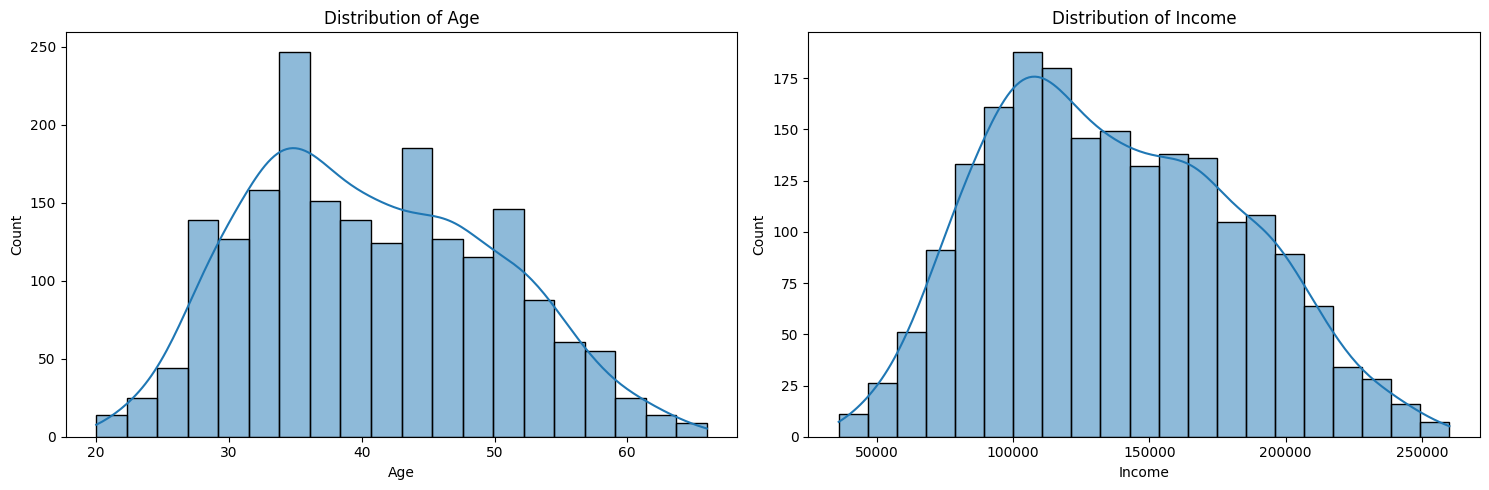

In [361]:
# Histograms for 'Age' and 'Income'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df_data['Age'], kde=True, ax=ax1)
ax1.set_title('Distribution of Age')
sns.histplot(df_data['Income'], kde=True, ax=ax2)
ax2.set_title('Distribution of Income')
plt.tight_layout()
plt.show()

The histograms reveal that both Age and Income distributions in the dataset are approximately normal but with notable characteristics. The Age distribution is slightly right-skewed, peaking around 35-40 years, with a range from 20 to 65 years and an interesting dip around 45-50 years. The Income distribution shows a more pronounced right skew, centered around 100,000-125,000 units, extending up to 250,000, with a minimum around 50,000.

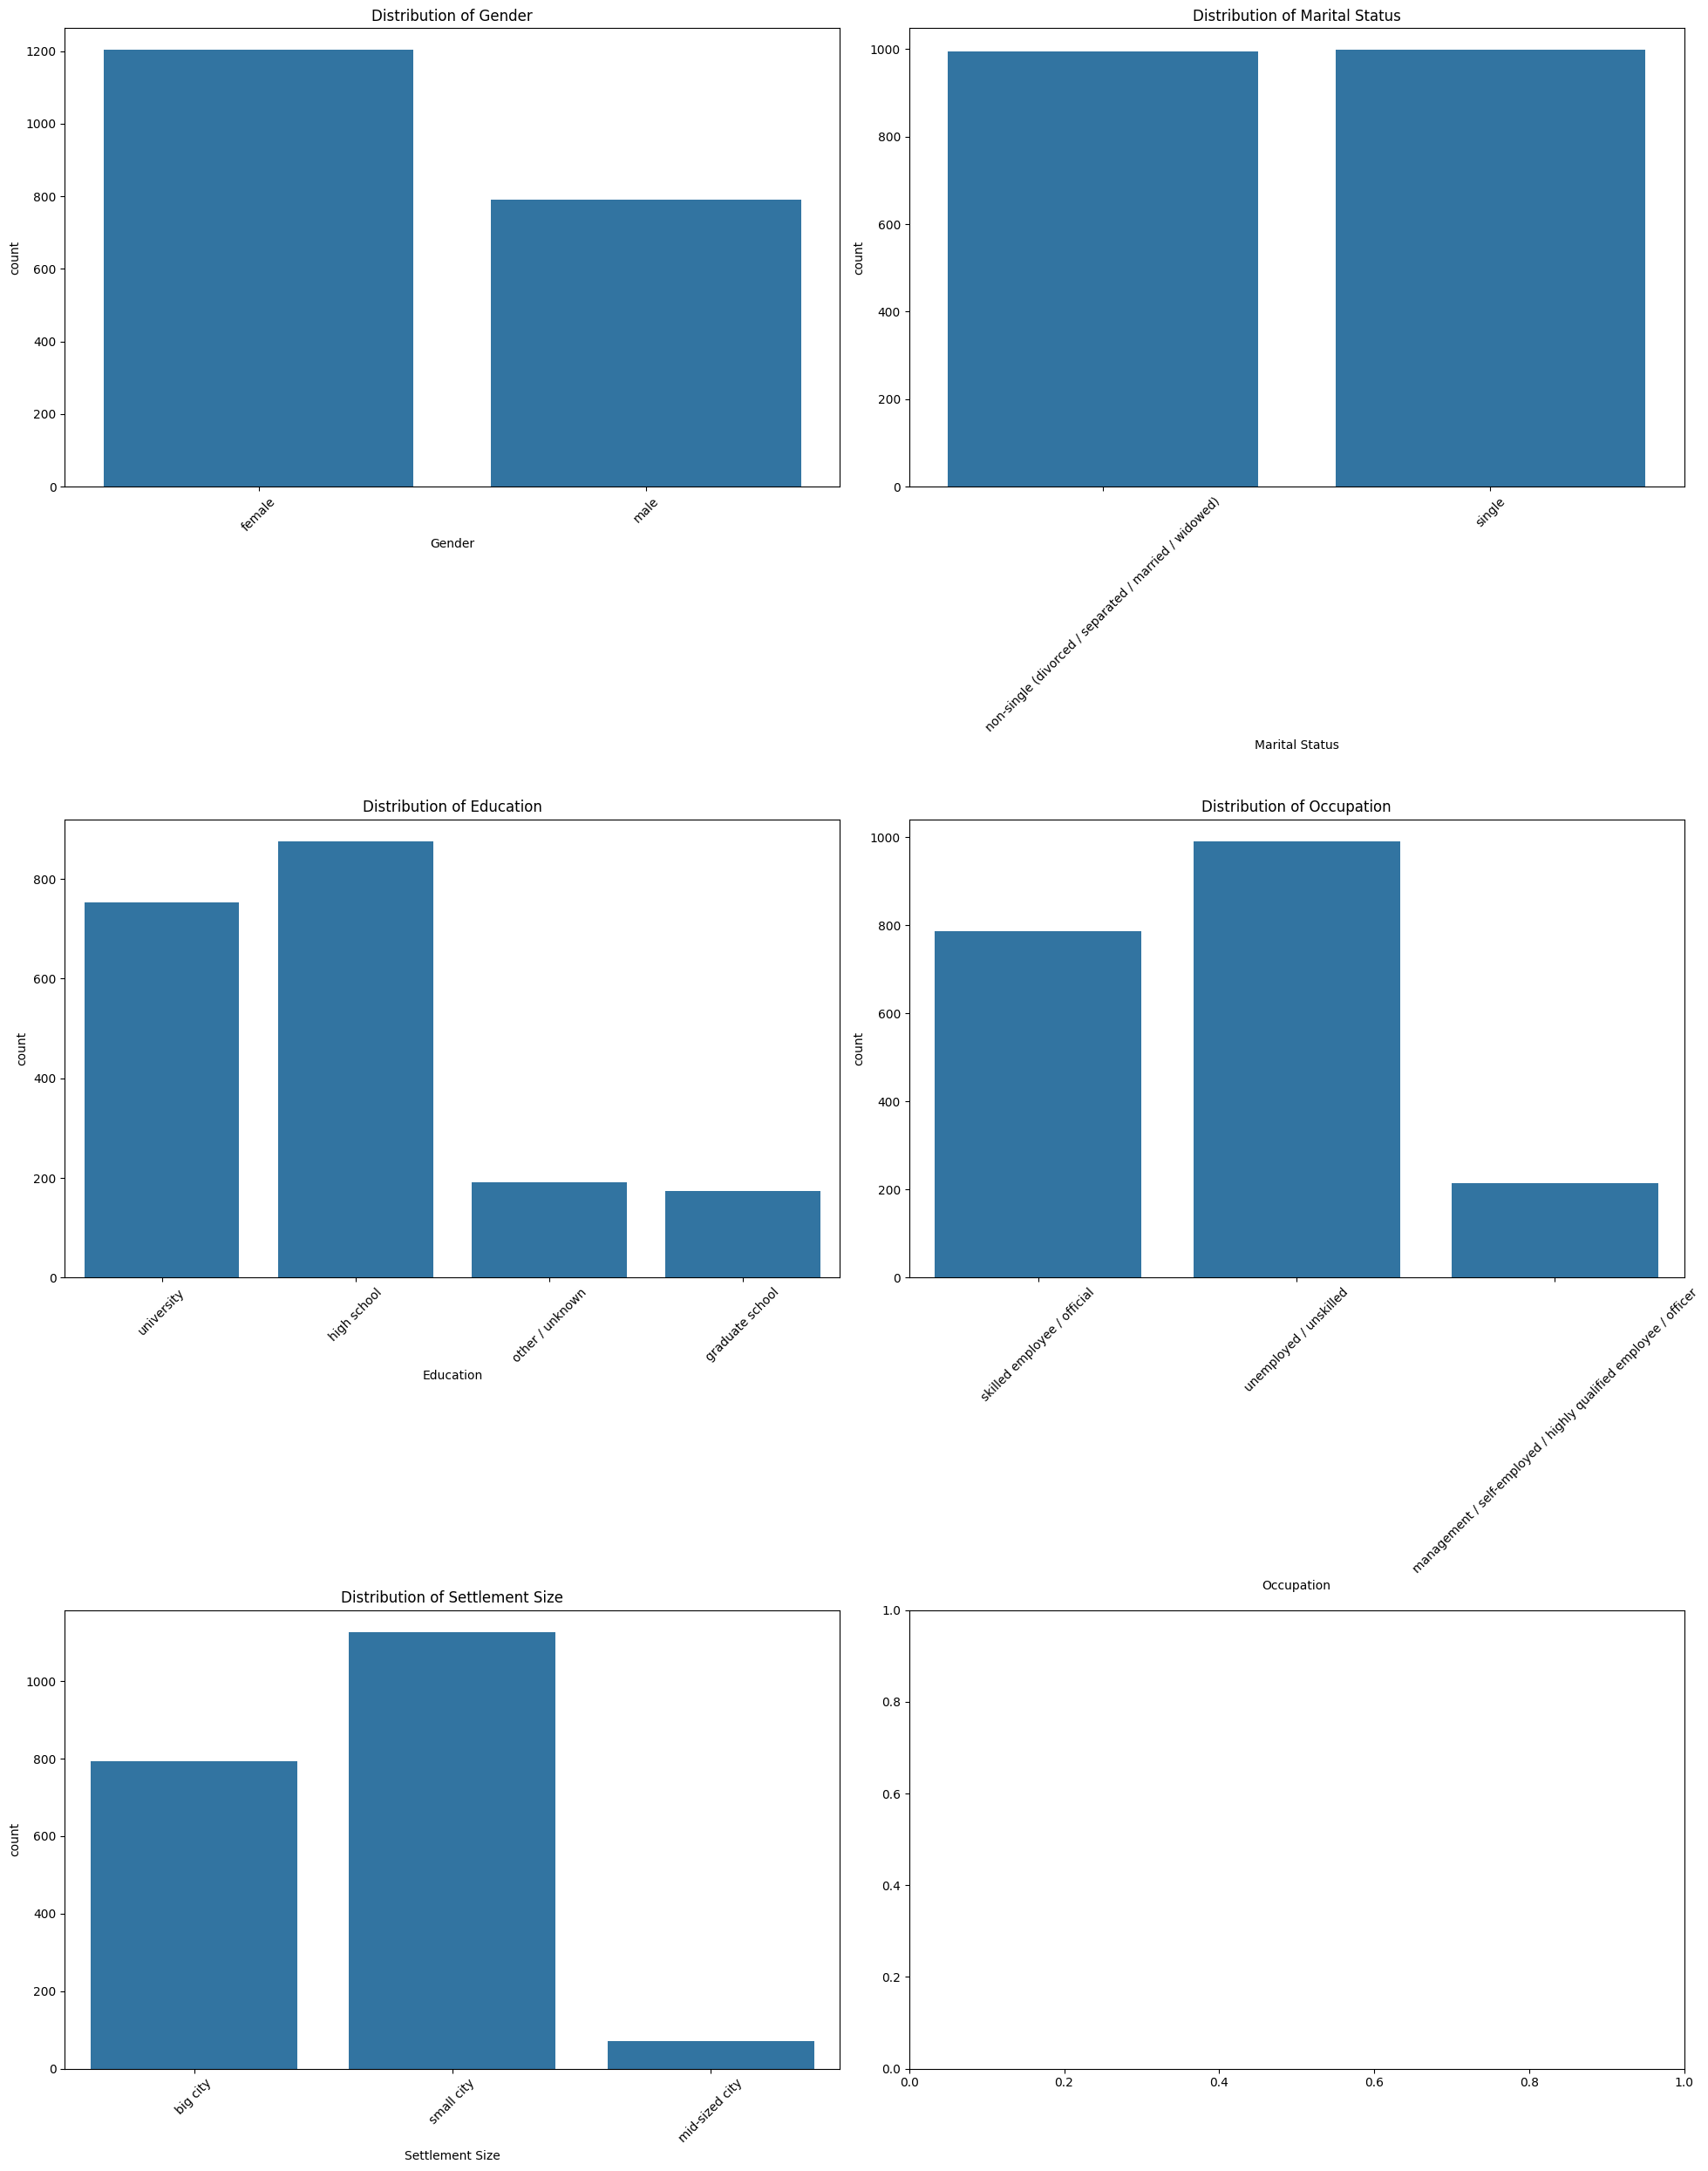

In [362]:
# Bar charts for categorical variables
categorical_vars = ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']
fig, axes = plt.subplots(3, 2, figsize=(20, 25))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The bar charts illustrate the distribution of key categorical variables in the dataset. Gender shows a clear female majority. Marital status is nearly evenly split between single and non-single individuals. Education levels are dominated by high school and university graduates, with fewer individuals in graduate school or other categories. Occupationally, there's a relatively even split between unemployed/unskilled workers and skilled employees/officials, with a smaller proportion in management roles. Settlement size distribution reveals a preference for small cities, followed by big cities, with mid-sized cities being notably underrepresented.

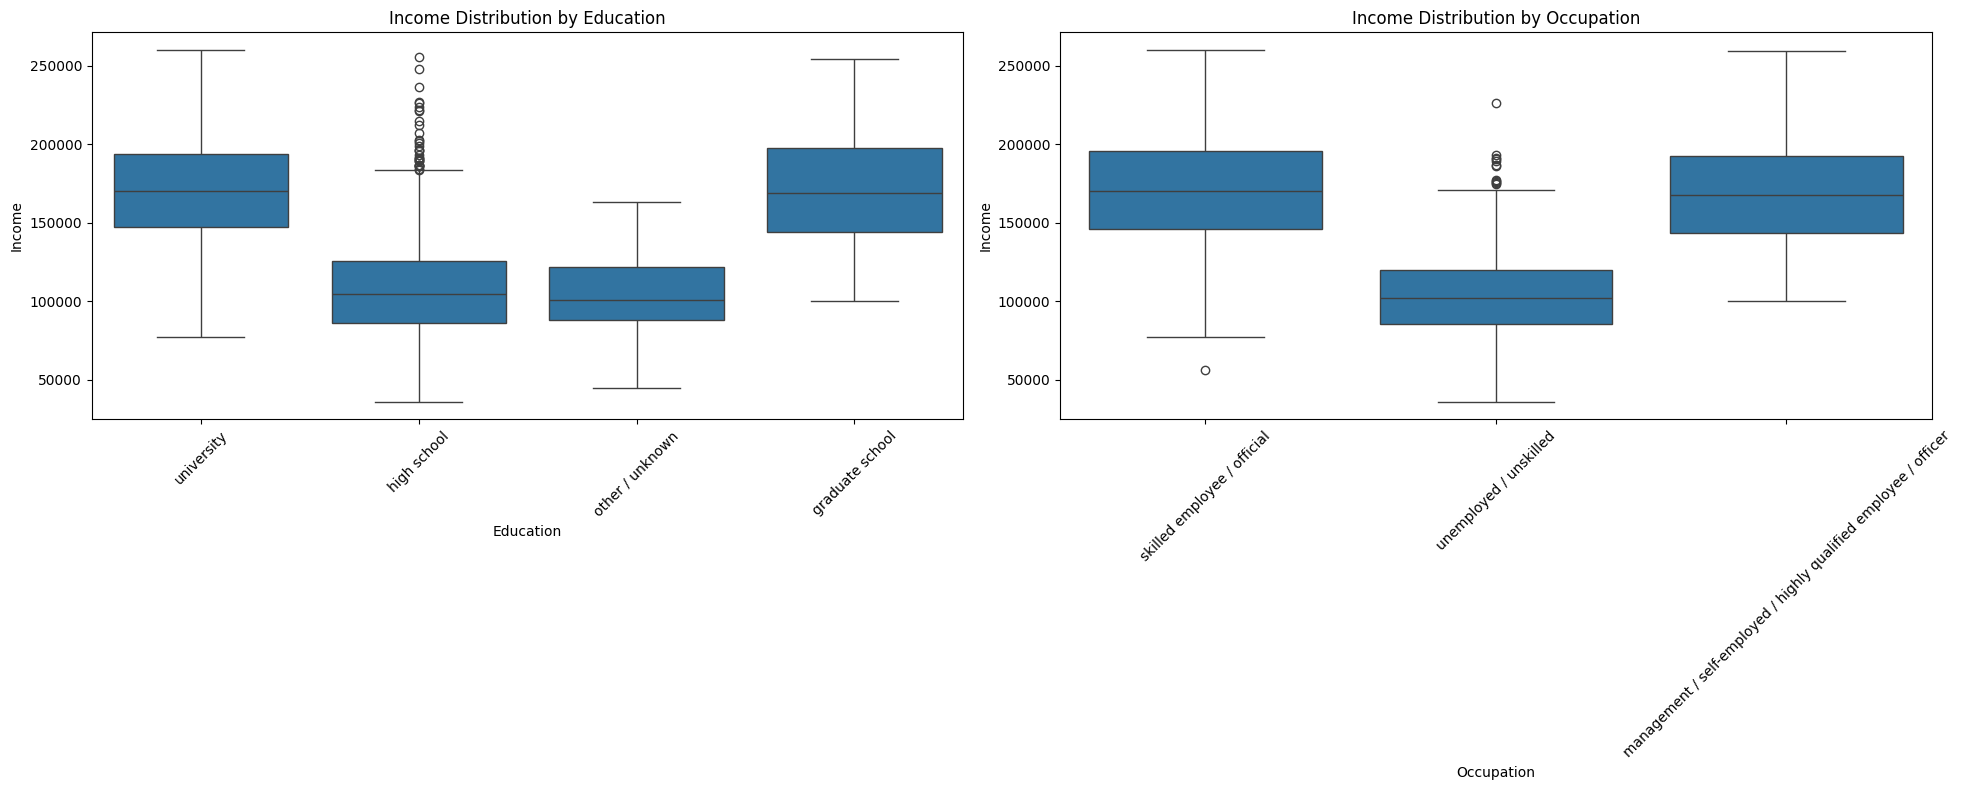

In [363]:
# Box plots for 'Income' by 'Education' and 'Occupation'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(x='Education', y='Income', data=df_data, ax=ax1)
ax1.set_title('Income Distribution by Education')
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(x='Occupation', y='Income', data=df_data, ax=ax2)
ax2.set_title('Income Distribution by Occupation')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The box plots reveal significant income disparities across education levels and occupations. In education, university and graduate school graduates show higher median incomes and wider income ranges compared to high school graduates and those in the "other/unknown" category. Occupationally, the management/self-employed/highly qualified group demonstrates the highest median income and the widest income range, followed by skilled employees/officials, while the unemployed/unskilled group has the lowest median income and narrowest range. Both plots display numerous outliers, particularly in the higher income ranges, suggesting some individuals in each category significantly outperform their peers. 

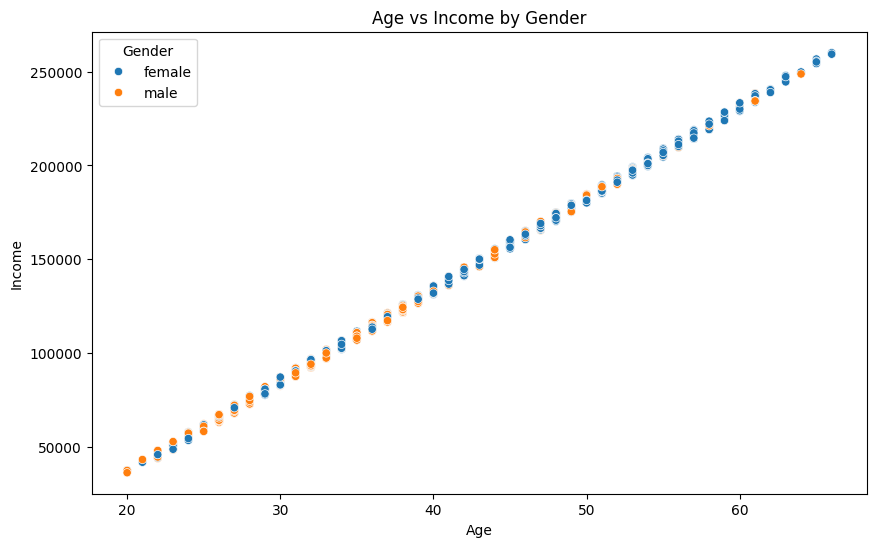

In [364]:
# Scatter plot for 'Age' vs 'Income'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', hue='Gender', data=df_data)
plt.title('Age vs Income by Gender')
plt.show()

The scatter plot illustrates a remarkably strong positive linear relationship between age and income for both genders. As age increases, there's a clear and consistent rise in income. The relationship appears almost perfectly linear, with very little scatter or deviation from the trend line. This unusually strong correlation suggests that age is a dominant factor in determining income in this dataset. Interestingly, there seems to be little to no gender-based income disparity, as the data points for males and females overlap significantly throughout the age range. The plot also shows a clear upper limit to income at each age, forming a distinct edge to the data distribution.

### 3.5. Variable Relationships

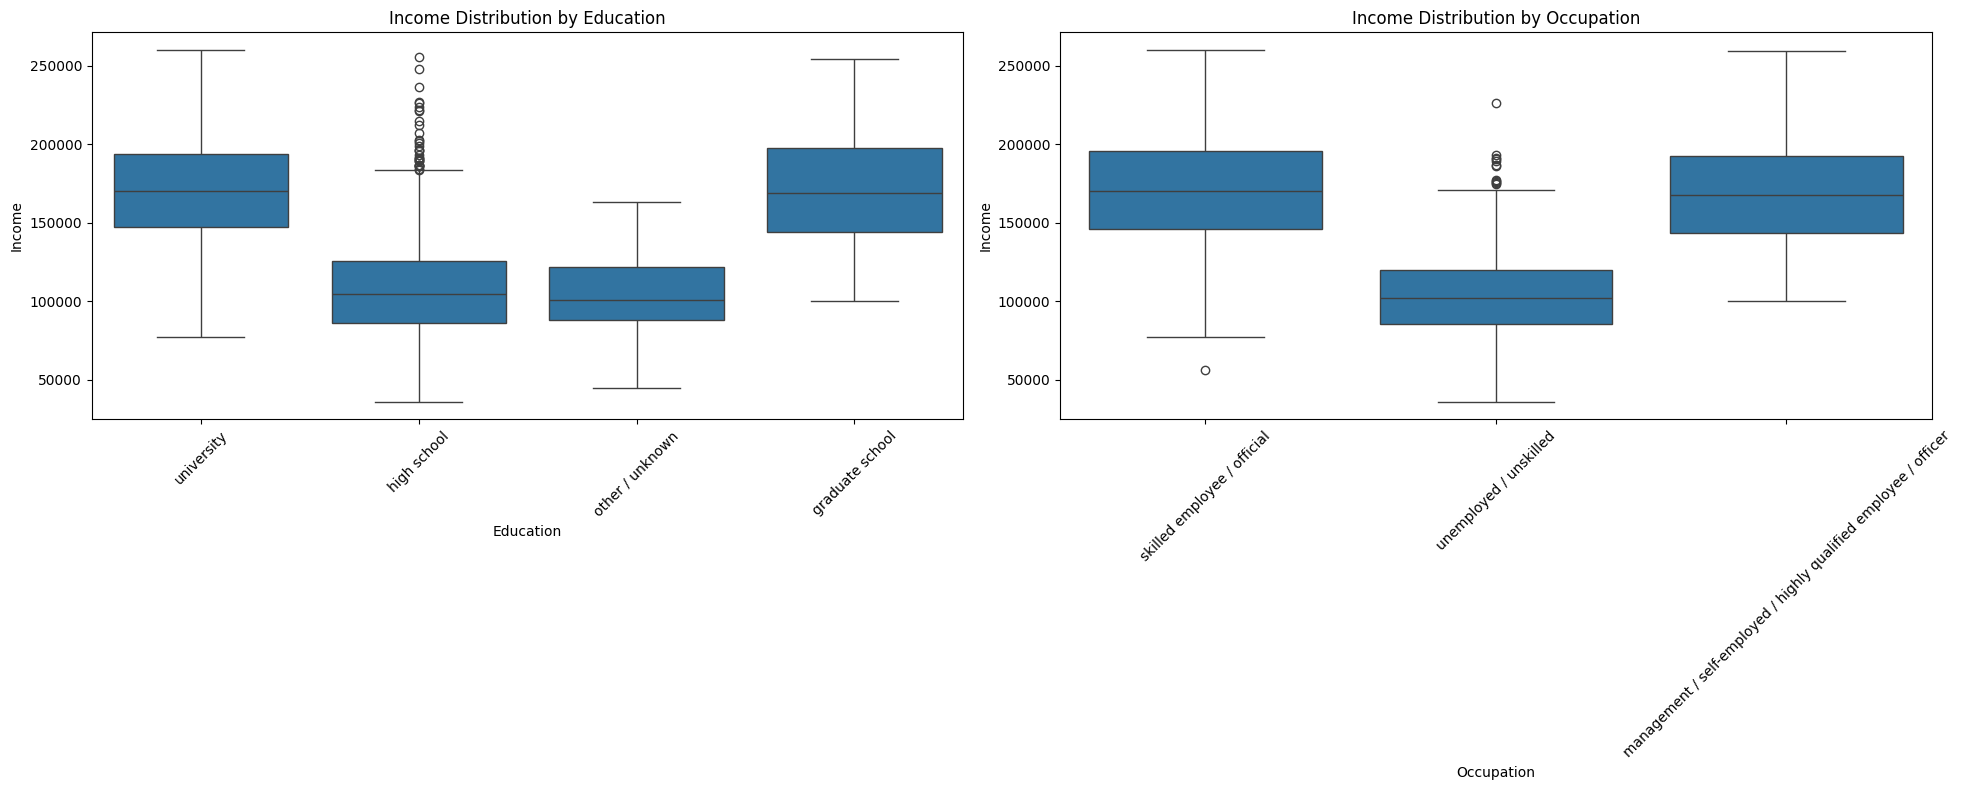

In [365]:
# Income distribution across education levels and occupations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(x='Education', y='Income', data=df_data, ax=ax1)
ax1.set_title('Income Distribution by Education')
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(x='Occupation', y='Income', data=df_data, ax=ax2)
ax2.set_title('Income Distribution by Occupation')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The box plots reveal significant income variations across education levels and occupations. In education, university and graduate school graduates show higher median incomes and wider ranges compared to high school graduates and the "other/unknown" category. Occupationally, the management/self-employed/highly qualified group demonstrates the highest median income and widest range, followed by skilled employees/officials, while the unemployed/unskilled group has the lowest median income and narrowest range. Both plots display numerous outliers, particularly in higher income brackets, indicating some individuals in each category significantly outperform their peers.

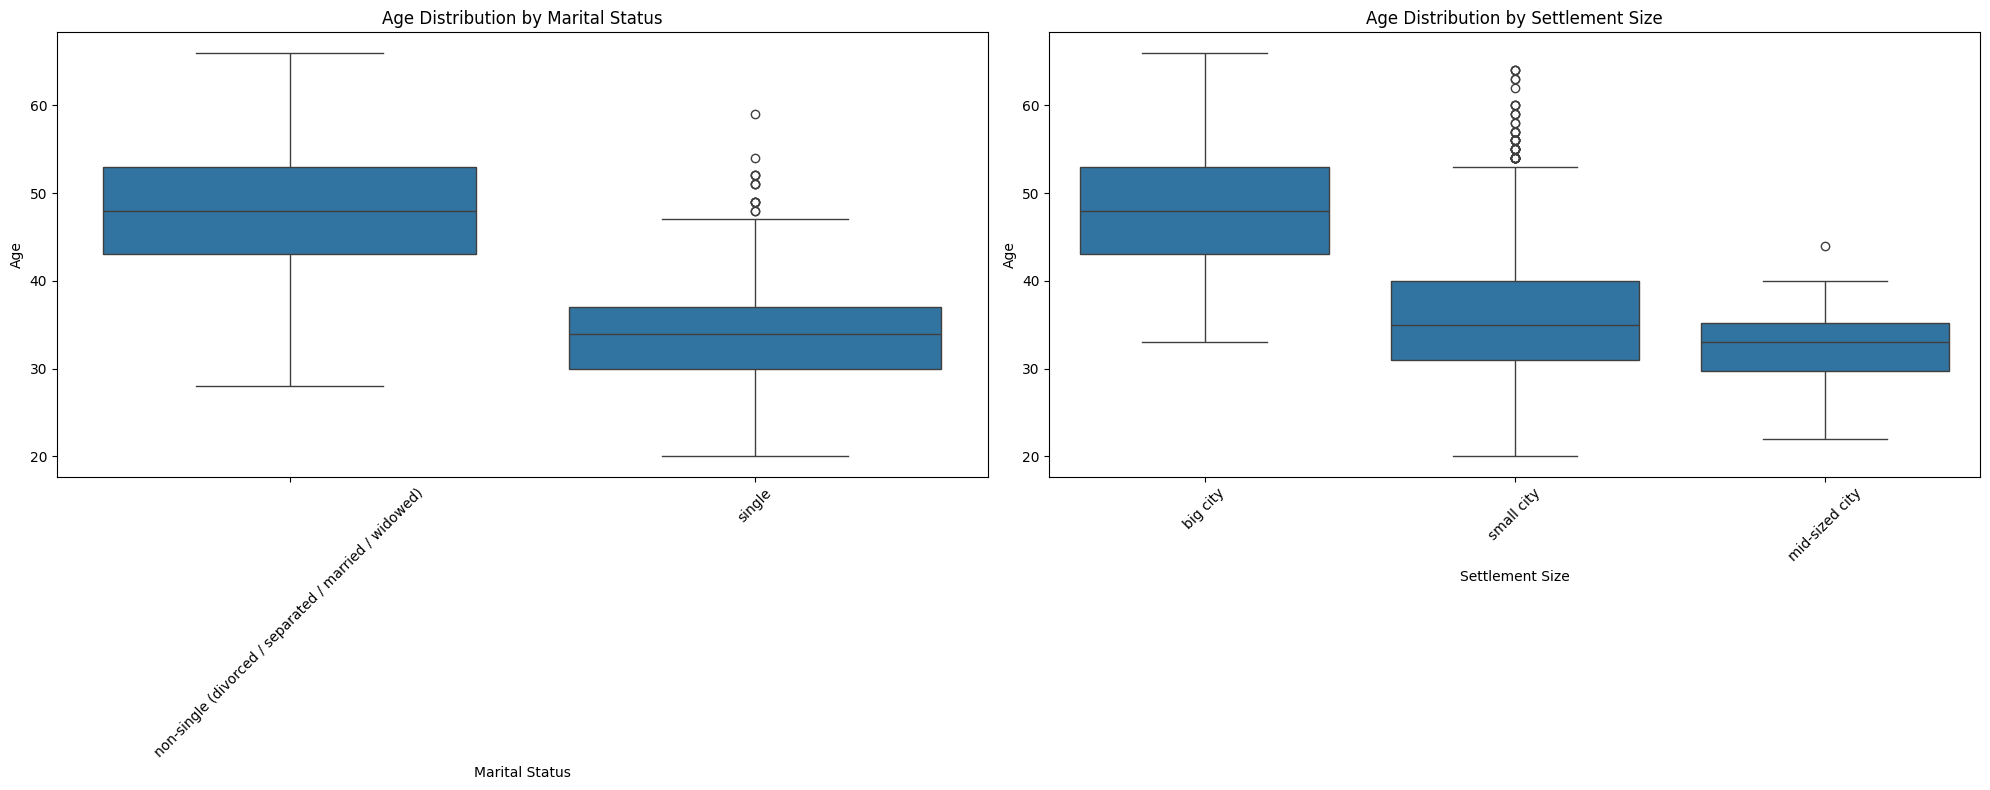

In [366]:
# Age distribution across marital status and settlement sizes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(x='Marital Status', y='Age', data=df_data, ax=ax1)
ax1.set_title('Age Distribution by Marital Status')
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(x='Settlement Size', y='Age', data=df_data, ax=ax2)
ax2.set_title('Age Distribution by Settlement Size')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The box plots illustrate age distributions across marital status and settlement sizes. Marital status shows a clear age difference, with non-single individuals (divorced/separated/married/widowed) having a higher median age and wider age range compared to single individuals. This aligns with expectations that marriage and other relationship changes often occur later in life. For settlement sizes, big cities have the highest median age and widest age range, followed by small cities, while mid-sized cities have the lowest median age and narrowest range. This suggests that older individuals tend to congregate in larger urban areas, while younger people are more prevalent in mid-sized cities. Both plots show some outliers, particularly in the upper age ranges, indicating the presence of older individuals across all categories. 

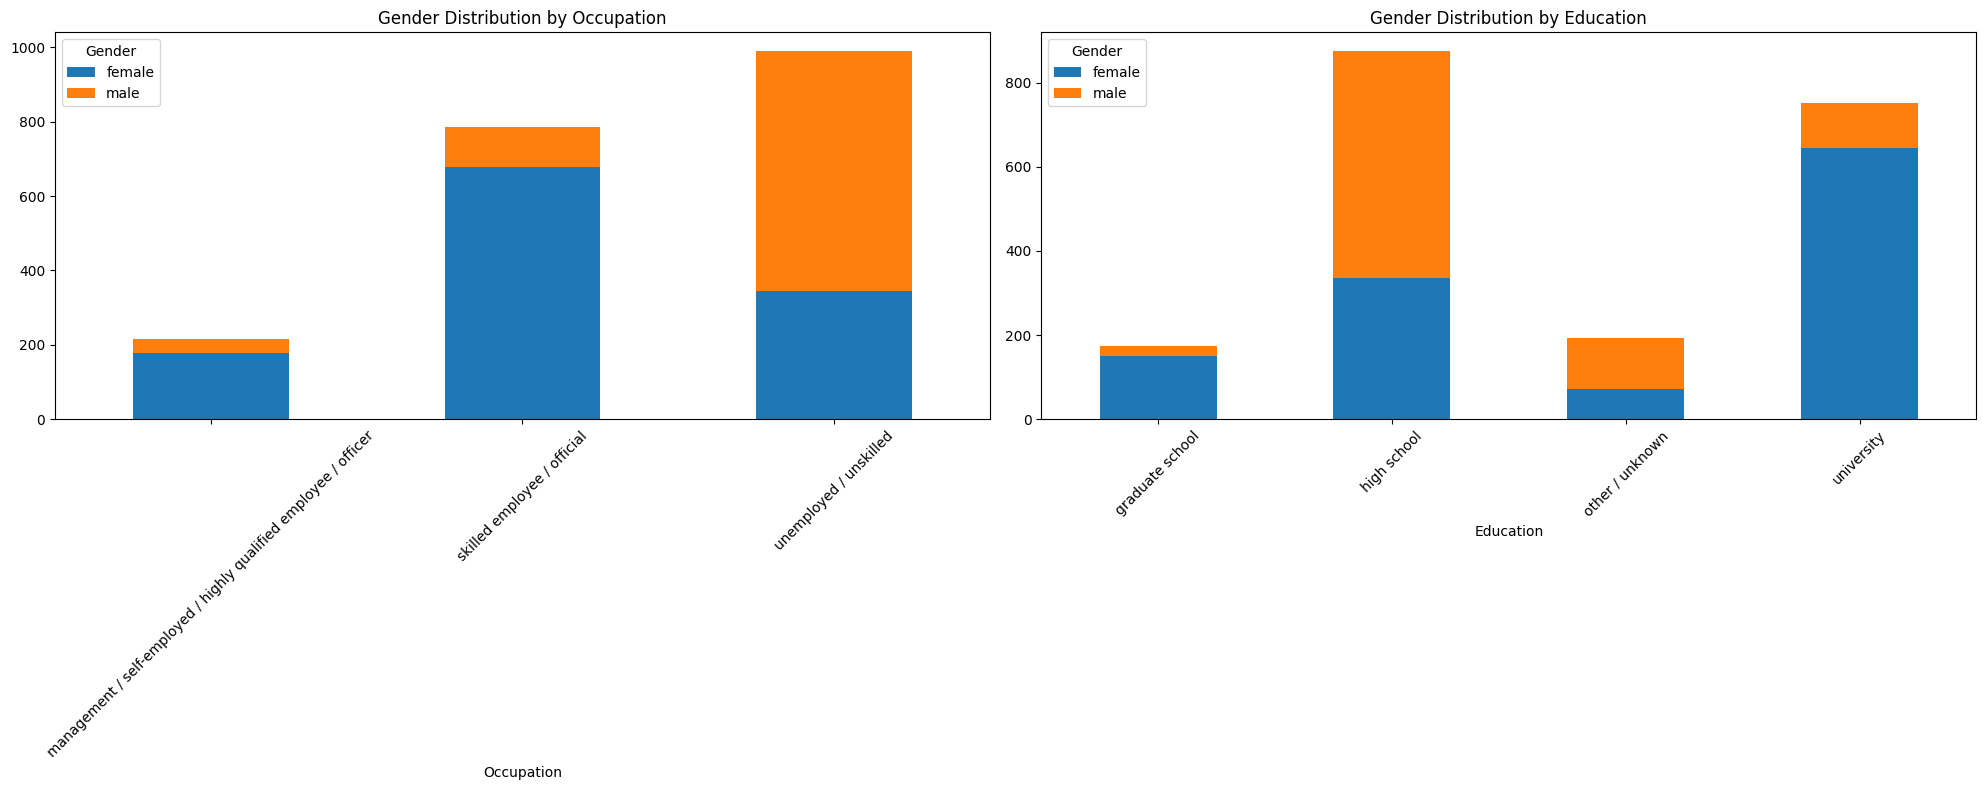

In [367]:
# Gender distribution across occupations and education levels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
df_data.groupby(['Occupation', 'Gender']).size().unstack().plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Gender Distribution by Occupation')
ax1.tick_params(axis='x', rotation=45)

df_data.groupby(['Education', 'Gender']).size().unstack().plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Gender Distribution by Education')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The stacked bar charts reveal gender distributions across occupations and education levels. In occupations, females dominate in skilled employee/official roles and are slightly overrepresented in management/self-employed positions, while males are more prevalent in the unemployed/unskilled category. Education-wise, females show higher representation in university and graduate school categories, while males slightly outnumber females in high school and "other/unknown" categories. These visualizations highlight gender disparities in both occupational roles and educational attainment, suggesting potential areas for further investigation into gender-based differences in career paths and educational opportunities.

### 3.6. Key Insights

1. Data Overview:
   - The dataset contains 2000 customer records with 7 features.
   - There are only 2 missing values in the Income column, which is negligible (0.1% of the data).

2. Age and Income Distribution:
   - Age ranges from 20 to 66 years, with a mean of about 41 years.
   - The age distribution is relatively normal, with a slight right skew.
   - Income ranges from about $36,035 to $260,137, with a mean of $137,101.
   - Income distribution is also relatively normal, with a slight right skew.

3. Categorical Variables:
   - Gender: 60.4% female, 39.6% male, showing a slight female majority.
   - Marital Status: Almost evenly split between single (50.1%) and non-single (49.9%).
   - Education: High school (44.0%) and university (37.7%) are the most common, with fewer having graduate school (8.7%) or other/unknown (9.6%) education.
   - Occupation: Mostly unemployed/unskilled (49.7%) or skilled employees/officials (39.5%), with fewer in management/self-employed roles (10.8%).
   - Settlement Size: Predominantly small city (56.5%) or big city (39.8%), with very few in mid-sized cities (3.6%).

4. Relationships between Variables:
   - There is an extremely strong positive correlation between Age and Income (correlation coefficient: 0.99953). This unusually high correlation suggests that age is a near-perfect predictor of income in this dataset, which is atypical and may warrant further investigation.
   - Income distribution varies significantly across education levels and occupations:
     - Graduate school and university educated individuals tend to have higher incomes.
     - Management/self-employed individuals have notably higher incomes than other occupation categories.
   - Gender distribution varies across occupations and education levels:
     - More females in skilled employee/official roles, while more males in unemployed/unskilled roles.
     - Higher proportion of females with university education.

5. Potential Segmentation Factors:
   - Education, Occupation, and Settlement Size show clear distinctions between groups and could be useful for customer segmentation.
   - The strong Age-Income correlation suggests these variables could be powerful predictors for segmentation.

6. Outliers and Anomalies:
   - The Income distribution shows some high-value outliers, particularly in the university and graduate school education categories.
   - The extremely high correlation between Age and Income is unusual and should be examined further.

7. Additional Observations:
   - The near-perfect correlation between Age and Income is highly unusual in real-world scenarios and may indicate a data quality issue or a very specific sample selection.
   - The occupation distribution, with nearly half being unemployed/unskilled, is notable and may reflect specific economic conditions or sampling bias.
   - The low representation of mid-sized cities in the Settlement Size variable could impact the generalizability of insights related to this feature.

## 4. Customer Segmentation
### 4.1. Feature Preparation

This section focuses on preparing the dataset for customer segmentation analysis. It begins by selecting relevant features from the dataset, including both numeric (Age, Income) and categorical variables (Gender, Marital Status, Education, Occupation, Settlement Size). The code then sets up a preprocessing pipeline using scikit-learn's ColumnTransformer. This pipeline standardizes numeric features and applies one-hot encoding to categorical features, ensuring that all variables are in a suitable format for machine learning algorithms. The preprocessing steps are applied to the data, resulting in a transformed dataset where categorical variables are converted into binary columns and numeric variables are scaled. Finally, the processed data is converted into a new DataFrame with appropriate column names, ready for subsequent analysis and modeling in the customer segmentation process.

In [368]:
# Separate features and target (if any)
features = ['Gender', 'Marital Status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement Size']
X = df_data[features]

In [369]:
# Create preprocessing steps
numeric_features = ['Age', 'Income']
categorical_features = ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

if version.parse(sklearn.__version__) >= version.parse("0.23"):
    ohe = OneHotEncoder(drop='first', sparse_output=False)
else:
    ohe = OneHotEncoder(drop='first', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', ohe, categorical_features)
    ])

In [370]:
# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
onehot_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = []
for i, feature in enumerate(categorical_features):
    cat_feature_names.extend([f"{feature}_{category}" for category in onehot_encoder.categories_[i][1:]])

feature_names = numeric_features + cat_feature_names

In [371]:
# Create a new dataframe with processed features
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

### 4.2. Optimal Cluster Selection

This section focuses on determining the optimal number of clusters for customer segmentation using two common methods: the Elbow Method and Silhouette Score analysis. The code iterates through a range of potential cluster numbers (from 2 to 10) and applies K-means clustering for each. It calculates and stores the inertia (within-cluster sum of squares) and silhouette score for each clustering attempt. The results are then visualized in two plots: an Elbow Curve showing inertia vs. number of clusters, and a Silhouette Score plot. Finally, the code automatically selects the optimal number of clusters based on the highest silhouette score, providing a data-driven decision for the subsequent segmentation process.

In [372]:
# Elbow Method
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed, kmeans.labels_))

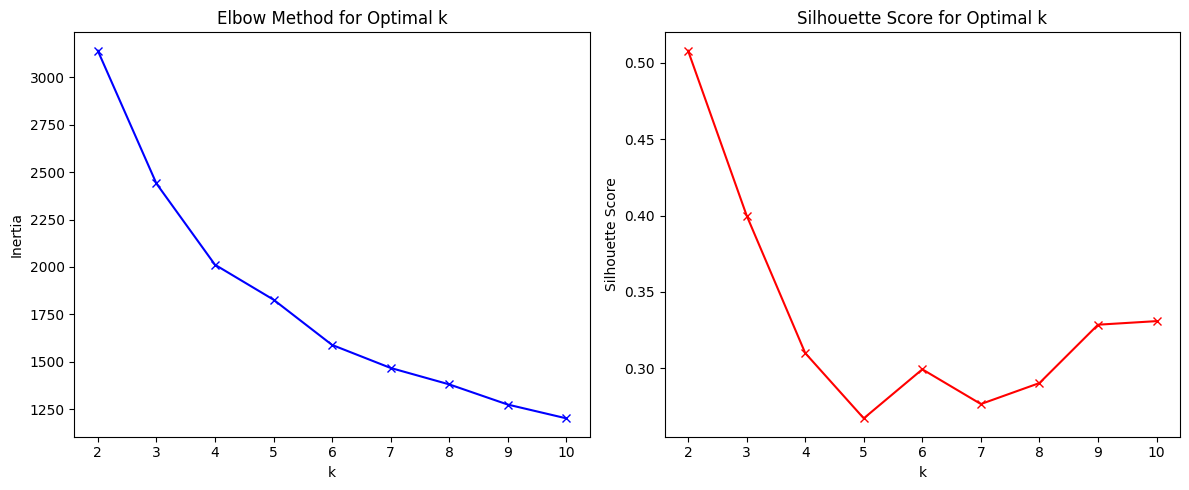

In [373]:
# Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

The plots illustrate two methods for determining the optimal number of clusters (k) for K-means clustering. The Elbow Method graph shows a steady decrease in inertia as k increases, with no clear "elbow" point, suggesting that the optimal k is not obvious from this method alone. The Silhouette Score plot, however, provides more insight. It shows a peak at k=2, indicating that a two-cluster solution might provide the best balance between cluster cohesion and separation. After this peak, the silhouette scores generally decrease with some fluctuations, reinforcing that two clusters could be optimal. However, there's a slight uptick at k=9 and k=10, which might be worth investigating if a more granular segmentation is desired.

In [374]:
# Determine ideal cluster number
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


### 4.3. K-means++ Clustering

This section applies the K-means++ clustering algorithm to segment customers based on the preprocessed data. The code uses the optimal number of clusters determined earlier to perform K-means++ clustering. It then generates a table of cluster centers, which represent the average characteristics of each customer segment. These centers are transformed back to their original scales for interpretability. The resulting cluster_centers_df provides a snapshot of each segment's typical features, including both numeric (Age, Income) and categorical variables. Additionally, the code counts the number of customers assigned to each cluster, giving an idea of the size of each segment.

In [375]:
# Apply K-means++ algorithm
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_processed)

In [376]:
# Generate cluster centers table
cluster_centers_scaled = kmeans.cluster_centers_

# Separate numeric and categorical features
num_features_count = len(numeric_features)
cat_features_count = X_processed.shape[1] - num_features_count

# Inverse transform numeric features
scaler = preprocessor.named_transformers_['num']
num_centers = scaler.inverse_transform(cluster_centers_scaled[:, :num_features_count])

# Inverse transform categorical features
encoder = preprocessor.named_transformers_['cat']
cat_centers = cluster_centers_scaled[:, num_features_count:]
cat_centers_inverted = encoder.inverse_transform(cat_centers)

# Combine numeric and categorical centers
cluster_centers = np.column_stack([num_centers, cat_centers_inverted])

In [377]:
# Create a DataFrame with the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
      Gender Marital Status   Age Education       Income  \
0  33.697239  102689.161736  male    single  high school   
1  48.031665  172742.633299  male    single   university   

                    Occupation Settlement Size  
0       unemployed / unskilled      small city  
1  skilled employee / official      small city  


Cluster 0 represents younger, lower-income customers. The typical member is a 34-year-old male with a high school education, earning about $102,689 annually. They are likely to be unemployed or in unskilled work and live in a small city.


Cluster 1 represents older, higher-income customers. The typical member is a 48-year-old male with a university education, earning about $172,743 annually. They are likely to be skilled employees or officials and also live in a small city.

In [378]:
# Count customers per cluster
customer_counts = pd.Series(cluster_labels).value_counts().sort_index()
print("\nCustomers per cluster:")
print(customer_counts)


Customers per cluster:
0    1014
1     979
Name: count, dtype: int64


### 4.4. Agglomerative Clustering

This section introduces an alternative clustering method, Agglomerative Clustering, to segment the customer base. Unlike K-means, which starts with centroids and assigns points to the nearest cluster, Agglomerative Clustering is a hierarchical approach that starts with individual data points and progressively merges them into clusters. The code applies this method using the previously determined optimal number of clusters. It then fits the model to the preprocessed data and predicts cluster labels for each customer. Finally, it counts the number of customers assigned to each cluster, providing a comparison point to the K-means++ results.

In [379]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(X_processed)

In [380]:
# Count customers per cluster
agg_customer_counts = pd.Series(agg_labels).value_counts().sort_index()
print("Agglomerative Clustering - Customers per cluster:")
print(agg_customer_counts)

Agglomerative Clustering - Customers per cluster:
0    999
1    994
Name: count, dtype: int64


### 4.5. Cluster Profiling

This section focuses on creating detailed profiles of the customer segments identified by both K-means++ and Agglomerative Clustering methods. It begins by adding cluster labels from both algorithms to the original dataset, allowing for a comprehensive analysis of each cluster's characteristics. The code then defines a function, profile_clusters, which calculates key statistics for each cluster, including mean age and income, as well as the most common categories for categorical variables like gender, marital status, education, occupation, and settlement size. This profiling provides a more nuanced understanding of each customer segment, going beyond the cluster centers to show the dominant characteristics of customers within each group.

In [381]:
# Add cluster labels to the original dataframe
df_data['KMeans_Cluster'] = cluster_labels
df_data['Agglomerative_Cluster'] = agg_labels


In [382]:
# Analyze cluster characteristics
def profile_clusters(df, cluster_column):
    profiles = df.groupby(cluster_column).agg({
        'Age': 'mean',
        'Income': 'mean',
        'Gender': lambda x: x.value_counts().index[0],
        'Marital Status': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Occupation': lambda x: x.value_counts().index[0],
        'Settlement Size': lambda x: x.value_counts().index[0]
    })
    return profiles

In [383]:
kmeans_profiles = profile_clusters(df_data, 'KMeans_Cluster')
print("K-means++ Cluster Profiles:")
print(kmeans_profiles)

K-means++ Cluster Profiles:
                      Age         Income  Gender  \
KMeans_Cluster                                     
0               33.697239  102689.161736    male   
1               48.031665  172742.633299  female   

                                                   Marital Status  \
KMeans_Cluster                                                      
0                                                          single   
1               non-single (divorced / separated / married / w...   

                  Education                   Occupation Settlement Size  
KMeans_Cluster                                                            
0               high school       unemployed / unskilled      small city  
1                university  skilled employee / official        big city  


In [384]:
agg_profiles = profile_clusters(df_data, 'Agglomerative_Cluster')
print("\nAgglomerative Cluster Profiles:")
print(agg_profiles)


Agglomerative Cluster Profiles:
                             Age        Income  Gender  \
Agglomerative_Cluster                                    
0                      47.566567  170475.71972  female   
1                      33.876258  103557.95171    male   

                                                          Marital Status  \
Agglomerative_Cluster                                                      
0                      non-single (divorced / separated / married / w...   
1                                                                 single   

                         Education                   Occupation  \
Agglomerative_Cluster                                             
0                       university  skilled employee / official   
1                      high school       unemployed / unskilled   

                      Settlement Size  
Agglomerative_Cluster                  
0                            big city  
1                          small city  


Cluster 0 represents older, higher-income customers. The typical member is about 48 years old, female, with an average income of $170,476. They are likely to be non-single (divorced, separated, married, or widowed), have a university education, work as skilled employees or officials, and live in a big city.

Cluster 1 represents younger, lower-income customers. The typical member is about 34 years old, male, with an average income of $103,558. They are likely to be single, have a high school education, be unemployed or in unskilled work, and live in a small city.


### 4.6. Technique Comparison

In [385]:
# Compare clustering results
ari_score = adjusted_rand_score(cluster_labels, agg_labels)
print(f"Adjusted Rand Index between K-means++ and Agglomerative Clustering: {ari_score}")

Adjusted Rand Index between K-means++ and Agglomerative Clustering: 0.9097624732865318


The ARI score of 0.9098 indicates a very high level of agreement between the two clustering methods. This score ranges from -1 to 1, where 1 indicates perfect agreement, 0 suggests random labeling, and negative values indicate less agreement than expected by chance.

A score this close to 1 (0.9098) suggests that K-means++ and Agglomerative Clustering have produced nearly identical customer segmentations. This high consistency across different clustering techniques provides strong confidence in the validity and robustness of the identified customer segments.


In [386]:
# Identify overlapping segments
confusion_matrix = pd.crosstab(df_data['KMeans_Cluster'], df_data['Agglomerative_Cluster'])
print("\nConfusion Matrix between K-means++ and Agglomerative Clustering:")
print(confusion_matrix)


Confusion Matrix between K-means++ and Agglomerative Clustering:
Agglomerative_Cluster    0    1
KMeans_Cluster                 
0                       33  981
1                      966   13


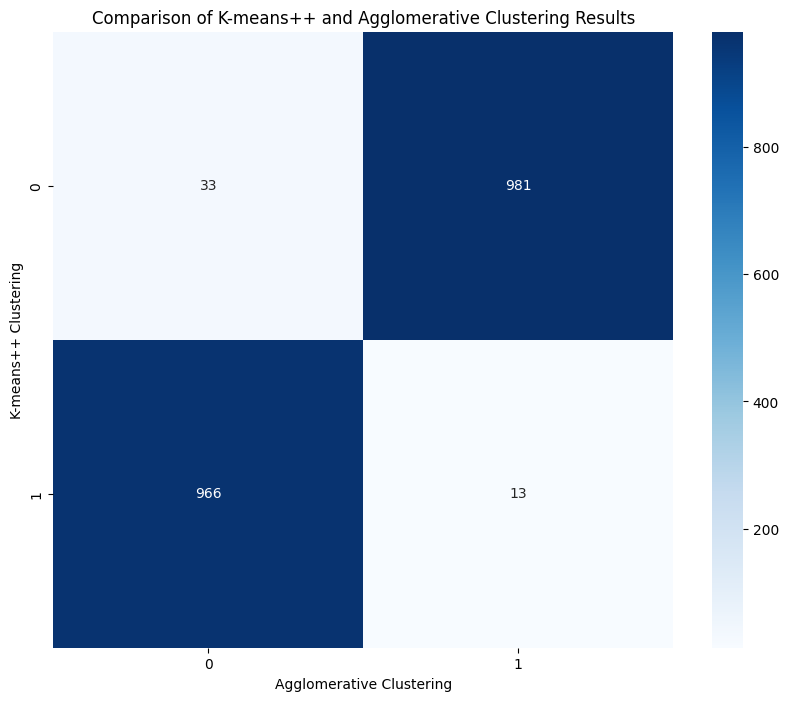

In [387]:
# Plot the heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Comparison of K-means++ and Agglomerative Clustering Results')
plt.xlabel('Agglomerative Clustering')
plt.ylabel('K-means++ Clustering')
plt.show()

This confusion matrix provides a detailed comparison of how K-means++ and Agglomerative Clustering assigned customers to clusters:

1. High agreement: The matrix shows strong diagonal dominance, confirming the high Adjusted Rand Index score we saw earlier.

2. Cluster 0 correspondence: 
   - 966 customers assigned to Cluster 0 by K-means++ were also assigned to Cluster 0 by Agglomerative Clustering.
   - Only 13 customers from K-means++ Cluster 0 were assigned to Cluster 1 by Agglomerative Clustering.

3. Cluster 1 correspondence:
   - 981 customers assigned to Cluster 1 by K-means++ were also assigned to Cluster 1 by Agglomerative Clustering.
   - Only 33 customers from K-means++ Cluster 1 were assigned to Cluster 0 by Agglomerative Clustering.

4. Total agreement: 1947 out of 1993 customers (97.7%) were assigned to corresponding clusters by both methods.

5. Discrepancies: Only 46 customers (2.3%) were assigned differently by the two methods.

## 5. Conclusion and Recommendations

### 5.1. Key Findings
- Two distinct customer segments were identified: a younger, lower-income group and an older, higher-income group.
- Age and income are strongly correlated and are the primary differentiators between segments.
- Segments differ significantly in education level, occupation, marital status, and settlement size.
- Gender distribution varies between segments, with more males in the younger segment and more females in the older segment.
- Both K-means++ and Agglomerative Clustering produced highly consistent results (ARI: 0.91), reinforcing the robustness of the segmentation.

### 5.2. Distinctive Segments
1. Young Urban Professionals (YUPs):
   - Average age: 33.7 years
   - Average income: $102,689
   - Predominantly male, single, high school educated
   - Typically unemployed or in unskilled positions
   - Primarily residing in small cities

2. Established Suburban Families (ESFs):
   - Average age: 48.0 years
   - Average income: $172,743
   - Predominantly female, married or previously married
   - University educated, skilled employees or officials
   - Primarily residing in big cities

### 5.3. Marketing Strategies

1. Young Urban Professionals (YUPs):

   a) Career Development Focus:
      - Launch a "Career Launchpad" program offering online courses and certifications in trending fields like data science, digital marketing, and UX design.
      - Partner with local startups and tech companies to provide internship opportunities and job fairs tailored to this segment.

   b) Urban Lifestyle Products:
      - Introduce a line of compact, multifunctional furniture suitable for small city apartments, emphasizing style and affordability.
      - Develop a "City Explorer" app that gamifies discovering local hotspots, events, and hidden gems in small cities, fostering community engagement.

   c) Financial Planning for the Future:
      - Create a "Future You" augmented reality app that visualizes long-term financial goals and provides personalized savings and investment advice.
      - Offer a "Skill-to-Income" calculator tool that shows potential salary increases based on acquiring new skills, encouraging educational investment.

   d) Social Networking and Dating:
      - Launch a "Singles in the City" event series combining professional networking with social mixers, catering to both career and personal life aspects.
      - Develop a dating app with a "Career Match" feature that connects singles based on professional aspirations and work-life balance preferences.

2. Established Suburban Families (ESFs):

   a) Family-Oriented Services:
      - Introduce a "Family Wellness" subscription box with age-appropriate activities for parents and children, promoting quality time and health.
      - Create a "Generational Wealth" financial planning service that helps parents set up educational funds and teach financial literacy to their children.

   b) Professional Development:
      - Offer executive coaching programs specifically designed for mid-career professionals looking to advance to senior management positions.
      - Develop a "Mentor Match" platform connecting experienced professionals with aspiring YUPs, fostering inter-segment networking and knowledge sharing.

   c) Suburban Lifestyle Enhancement:
      - Launch a "Smart Suburb" initiative, offering integrated home automation and security systems tailored for larger suburban homes.
      - Create a "Community Champions" program that rewards and recognizes individuals for their contributions to local community development and volunteering.

   d) Health and Wellness:
      - Introduce a "Family Fitness Challenge" app that gamifies health goals for the whole family, with rewards redeemable at local businesses.
      - Develop a "Midlife Wellness" program combining preventive health checks, stress management workshops, and personalized nutrition plans.

### 5.4. Limitations and Future Work

Limitations:
- The current segmentation is based on demographic and socioeconomic factors only, potentially missing psychographic and behavioral nuances.
- The binary gender classification may not capture the full spectrum of gender identities.
- The strong correlation between age and income might overshadow other important factors in the segmentation.

Future Work:
- Incorporate psychographic data (e.g., values, interests, lifestyles) to create more nuanced segments.
- Conduct qualitative research (e.g., interviews, focus groups) to gain deeper insights into customer motivations and pain points.
- Explore more granular segmentation within each major segment to identify niche marketing opportunities.
- Implement a longitudinal study to track how customers transition between segments over time.
- Investigate the effectiveness of the proposed marketing strategies through A/B testing and customer feedback loops.
- Explore the potential for using machine learning algorithms for predictive modeling of customer segment transitions and lifetime value.